# scikit-learnによるサポートベクトルマシン分類(SVC)とサポートベクトル回帰(SVR)

<div style="text-align: right;">
    <a href="svc_svm_in_scikit-learn.ipynb">このページのオリジナルのipynbファイル</a>
</div>

## 前置き

本講義では、説明変数$x$と目的変数$y$の関係の推定（回帰）問題を扱っている。

これまでは、その関係を、

$$
y = \sum_{i=1}^M w_i \phi_i(x)
$$

のように、説明変数(*)の関数を$M$個用意して、その線形結合で目的変数を表すという形に持ち込むと、$M$個の重回帰と同じ形式で扱えること、それをベイズ的な考え方で扱うと、誤差分布に関する見通しが良くなることを学んだ。

説明変数の関数の組$\{\phi_i (x)\ | \ i=1,\cdots,M \}$は、基底関数と呼ばれた。

ここでは基底関数を選ばなくても、データ自体からもっともらしい推定値とその周りの分散が求められる方法を考える。

ここでは、その代表的な例であるサポートベクトル回帰(SVR)を扱う。

サポートベクトルの考え方はもともとは、回帰と並ぶ機械学習のもう一つの課題である「分類」(classification)の手法として考案されたものである。

そこで、まずは分類の手法である「サポートベクトルマシン」(SVM)について試してみる。

(*) 説明変数のことを、機械学習の分野では、特徴量(features)、目的変数のことをtargetとと呼ぶことが多い。

## サポートベクトルマシン概説


別のノートで説明する。[こちら](http://8tops.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/svc_note.html)


## skitlearnにおけるサポートベクトルマシンの利用例

「Ipythonデータサイエンスクックブック」に載っている例でsvmの振る舞いを調べてみる。

原文（ただし、第2版）はgithubのサイトで公開されている。


第８章「機械学習」レシピ8.5 https://ipython-books.github.io/85-using-support-vector-machines-for-classification-tasks/

以下の英語の部分は、この書籍の原著からの引用である。


## 訓練データ (1)
2. We generate 2D points and assign a binary label according to a linear operation on the coordinates.

$x + y >1$のときtrue, それ以外はfalseになる$200\times 200$の2次元データyを作る。 [スクリプトに関するコメント](comments_python_scripts.html#numpy1)

２つの説明変数$x$, $y$に対して、目的変数$z$が対応すると考える。下図では面に$(x,y)$の値を、面に垂直方向に$z$があると想像してほしい。$z$の値は今の場合はTrueあるいはFalseであり、図では濃い青と薄い青で示している。

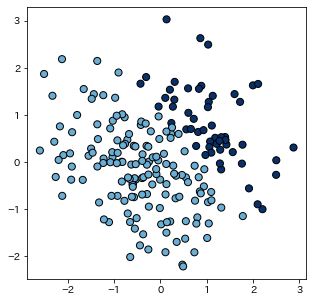

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 平面上で適当に200個の点を選ぶ 座標値(x,y)の200個の組 X[200,2]
X = np.random.randn(200, 2)
# ターゲットt[x[i],y[i]]の値を x[i]+ y[i] > 1 のときtrue, それ以外 false => それデータとしてtrue or falseの境界をsvcで見つける
# 右辺の評価式がtrueかfalseかを配列としてyに与える (ここでは200個の一次元は配列)
y = X[:, 0] + X[:, 1] > 1

# We display the points with their true labels.
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
cmap = plt.cm.Blues
ax.scatter(X[:, 0], X[:, 1],
           s=50, c=.5 + .5 * y,
           edgecolors='k',
           lw=1, cmap=cmap,
           vmin=0, vmax=1)

## サポートベクトル識別 (1) 線形

3. We now fit a linear **Support Vector Classifier** (SVC). This classifier tries to separate the two groups of points with a linear boundary (a line here, more generally a hyperplane).

 - 線形識別機の用意　(LinearSVC関数の利用)
 - データ(X,y)によりトレーニング(fit関数)

In [2]:
import sklearn.svm as svm
# We train the classifier.
est = svm.LinearSVC()
est.fit(X, y);

識別実行のための関数定義

4. We define a function that displays the boundaries and decision function of a trained classifier.

 - ２次元面のメッシュ (xx, yy) を作成し、メッシュ上のすべての点について境界のどちらかを判定 (decision_function)
  - 返り値をZ (「高さ」）に代入
 - Zの値をグラデーションで表示
 - 境界 (Z(x,y)=0)の線を引く

In [4]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# This function takes a SVM estimator as input.

def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

5. Let's take a look at the classification results with the linear SVC.

識別の実行と図示

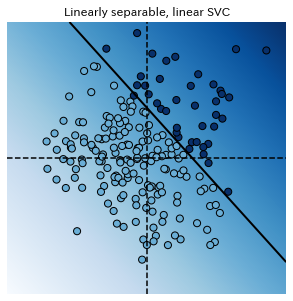

In [5]:
ax = plot_decision_function(
    est, "Linearly separable, linear SVC")


The linear SVC tried to separate the points with a line and it did a pretty good job.

**[学習]**

$x + y> a$ ($a$はデータが２分類できるように、$-2<a<2$程度の範囲で変えて試してみよう。 

余裕があれば、

- numpyのメソッド meshgrid, ravel, c_
- matplotlibのimshow, contour

について調べてみよう。




## 訓練データ(2) 線形な境界を引けない場合

6. We now modify the labels with a *XOR* function. A point's label is 1 if the coordinates have different signs. This classification is not linearly separable. Therefore, a linear SVC fails completely.

１，３象限はtrue, ２、４象限はfalseとなるデータを作成し、線形識別してみる。

ここでは、SVMのハイパーパラメータをグリッドサーチ（しらみつぶし探索）GridSearchCVによって良いものを選んでいる。（ここではそれには立ち入らない）

うまくいかないという警告が多数出力される！が、図は書かれる。

/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Score: 0.6


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

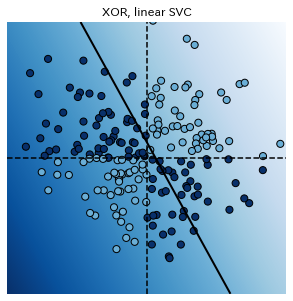

In [10]:
import sklearn.model_selection as ms

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) # 第１象限と第３象限のみfalse

# We train the classifier.
est = ms.GridSearchCV(svm.LinearSVC(),
                      {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "XOR, linear SVC")


実行してみると警告がたくさん出る。

これは、直線による区分は、当然だが、できないことを意味する。（収束しない！）

そこでSVRが登場するのだが、基本的なロジックは

1. これまでに用いてきたの同様に、線形分類で切るように、ある非線形関数（基底）により変換する。
2. そのような基底を見つけるのは一般には困難であるが、それは「カーネルトリック」と呼ばれる巧妙な方法で解決できる。

この部分は[別のノート](svc_note.html)で述べる。


## 非線形変換を含む識別機 (カーネル法の導入)

SVMでは、カーネルを用いて分類線（境界）を計算することができる。

データ${\bf x}$ に対する非線形関数$\{{\bf\phi}_1, {\bf\phi}_2, \cdots, {\bf\phi}_M\}$を用意し、
$$
y({\bf x}) = {\bf w}^T {\bf \phi}({\bf x}) +b
$$
のような、目標変数と説明変数の間に非線形な関係があるとし、係数${\bf w} = (w_1, w_2, \cdots, w_M)^T$を学習により求める。

この問題は、$k({\bf x},{\bf x'})= {\bf \phi} ({\bf x})^T{\bf \phi} ({\bf x}')$で定義されるカーネルを用いて

$$
 y({\bf x}) = \sum_{n=1}^{N} a_n t_n k({\bf x}, {\bf x_n}) + b
$$

の形式に変換できることが知られている。ここで$t_n$は訓練データ${\bf x_n}$に対する目標値であり、$a_n$は学習により求める係数である。

ここからは、${\bf \phi}$からカーネル$k({\bf x},{\bf x'})$を作ったことは**忘れることにする。**

つまり、<span class="mark">、非線形関数${\bf \phi}$を設定するのではなく、カーネル$k({\bf x},{\bf x'})$自体に何らかの関数を指定することにより識別学習を行えることである。（逆に言えば関数${\bf \phi}$はどのようなものかわからない。）</span>

Scikit-learnのSVCでは、カーネルとしては標準的に<span class="mark">ガウシアン放射基底関数(Gaussian Radial Basis Function)</span>が用いられている。この置き換えは**kernel trick**と呼ばれると書籍では述べている。

$$
k({\bf x},{\bf x'}) = \exp ( -\gamma || {\bf x}-{\bf x'} ||^2)
$$

が用いられる。パラメータ$\gamma$の値はグリッドサーチや交差検定を使って定められる。

> The $\phi$ function does not need to be computed explicitly. This is the kernel trick; it suffices to know the kernel $k(x,x')$. The existence of a function $\phi$ corresponding to a given kernel $k(x, x')$ is guaranteed by a mathematical theorem in functional analysis (Mercer's theorem).


7.  Fortunately, it is possible to use nonlinear SVCs by using **nonlinear kernels**. Kernels specify a nonlinear transformation of the points into a higher dimensional space. Transformed points in this space are assumed to be more linearly separable. By default, the **SVC** classifier in scikit-learn uses the **Radial Basis Function (RBF)** kernel:


もう少し立ち入った説明は[こちら](https://8tops.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/svr_note.html)


Score: 0.945


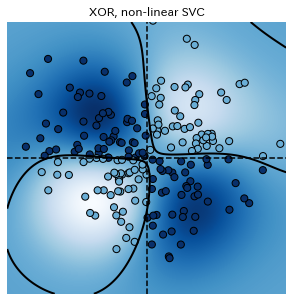

In [12]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# determine the hyper-parameters C and gamma, and then create the SVM machine object with the optimal parameters
est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "XOR, non-linear SVC")

This time, the non-linear SVC does a pretty good job at classifying these non-linearly separable points.

**[練習]**

最初の訓練データを作り変えてSVCの性能を試してみよう。

## 関数近似に対するサポートベクトルマシンの利用 (SVR)

分類のためのSVMは、逆に、境界領域にたくさんのデータがあり、境界線より離れたところに少ないデータが存在する場合を想定すると、境界線が回帰線に対応する。そのことを積極的に使ったのがサポートベクトル(マシン)回帰(SVR)である。若干の数理的ノートは[こちら](svr_note.html)

ここでは、「Ipythonデータサイエンスクックブック」に載っているサンプルを試してみる。


例によって、つぎのような、sin関数にノイズを載せたデータを用いる。



In [13]:
# データ作成用関数

def make_data_by_sin_gaussian(x):
    # y=sin (x)を計算し、ガウス分布に従うノイズを加える
    y = np.sin(x)
    e = [random.gauss(0, 0.2) for i in range(len(y))]
    # e = np.random.randn(len(x))*0.2
    y += e
    return y


### SVRによる推定

データの範囲を越えた予測は困難だが、無難な値に収まっている。（基底関数を多項式にとったリッジ回帰などと比べてみてほしい。）

[pythonスクリプトに関するコメント](comments_python_scripts.html#numpy2)

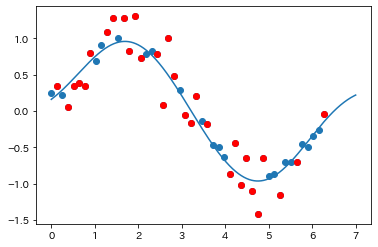

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import svm

x_max = 7.  # 予測の範囲の上限

# トレーニングデータ作成
n_tr = 50
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列
y = make_data_by_sin_gaussian(x)
X = x[:, np.newaxis]
   
# 学習を行う
svr = svm.SVR(kernel='rbf')
svr.fit(X, y)
  
# 回帰曲線を描く
x_test = np.linspace(0, x_max, 10000)
y_test = svr.predict(x_test[:, np.newaxis])
    
#グラフにプロットする。
plt.scatter(x, y)
plt.plot(x_test, y_test)
# サポートベクトルの表示（データポイントに赤で上書き）
plt.scatter(X[svr.support_], y[svr.support_], c="red") 
plt.show()
# print(X)

上の出力では、サポートベクトルであるデータを赤色で表示した。

推定の計算はデータの周辺部分（サポートベクトル）について行われる。サポートベクトルがデータ全体の数に比べて少なければ（疎（スパース）であるという）、計算時間の節約になる。これがSVRの利点である。

## skitlearnのカーネルリッジ回帰

内部のアルゴリズムは筆者にはわからないが、scikit-learnにはリッジ回帰のカーネル版があるようだ。

これを利用すると、基底関数を選ぶのではなく、カーネルを選択する。標準はrbfカーネルである。

以下は、その利用例である。

なお、SVRとKernelRidgeの比較は、

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py

にある。

(注)

このページにあるように、一般にはハイパーパラメータをいろいろ試して最適な値にするために「虱潰し」に探索する（交差検定）を行うGridSearchCVがよく利用される。

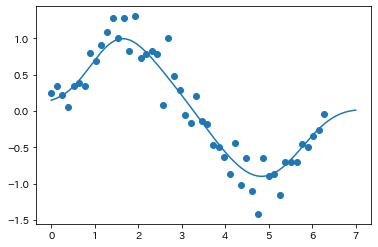

In [16]:
from sklearn.kernel_ridge import KernelRidge

kernel_ridge = KernelRidge(kernel="rbf")

# 学習を行う
kernel_ridge.fit(X, y)
  
# 回帰曲線を描く
x_test = np.linspace(0, x_max, 10000)
y_test = kernel_ridge.predict(x_test[:, np.newaxis])
    
#グラフにプロットする。
plt.scatter(x, y)
plt.plot(x_test, y_test)
plt.show()

## 参考：リッジ回帰による推定

比較のために、以前試したリッジ回帰（基底関数を$n$次のべき関数にしたもの：プログラム中ではdeg）を書いてみる。


0.06  -0.54  1.05  0.00
-0.00  0.07  -0.35  0.37  0.48  0.00
0.00  -0.00  0.00  0.04  -0.15  0.05  0.26  0.29  0.00


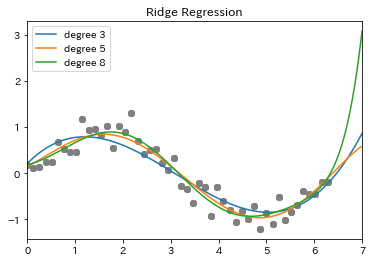

In [30]:
import sklearn.linear_model as lm
ridge = lm.Ridge()

for deg in [3,5,8]:
    ridge.fit(np.vander(X[:,0], deg +1), y)
    y_ridge = ridge.predict(np.vander(x_test, deg+1))
    plt.plot(x_test, y_ridge,
            label='degree ' + str(deg))
    plt.legend(loc=2)
     # モデルの係数表示
    print('  '. join(['%.2f' % c for c in ridge.coef_]))
    plt.scatter(x, y, c='gray')
    plt.xlim(0, x_max)
    plt.title('Ridge Regression')

## 偏ったデータの場合

初回にサンプルとして見せたデータに立ち返ってみる。
とりあえず[こちら](various_data4fitting.html)


## Relevance Vector Machine

PRML７章によれば、

SVMは様々なところで実用的に用いられているが、得られるのは識別や回帰の結果だけであり、予測に対する事後確率は計算できない。その点を改良する方法として関連ベクトルマシン（RVM: relevance vector machine)というのが考案されている。「疎なカーネルベースのベイズ流学習手法」であるらしい。

その解説がPRML7.2節に述べられている。この方法はMacrosoftが特許であったが、2019/09に期限切れになった。そのために、scikit-learnへの実装も昨年来進められているようだ。興味があればそれも使ってみてほしい。

- Wikipediaの解説 https://en.wikipedia.org/wiki/Relevance_vector_machine
- scikit-learnへの実装 https://sklearn-rvm.readthedocs.io/en/latest/about.html
- PRMLの記述に沿って実装して見ているページ https://qiita.com/ctgk/items/ee512530618a5eeccd1a
